# Accessing real estate data and prep it for analysis and predictions


1. access the files in the directory and opening them as pandas
2. concatenating all the files in one pandas dataframe
3. dataframe manipulation
   
    __a. drop columns__
    
    columns = ['Unnamed: 0', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS','NEWPROJECTTEXT','PROJECTNAME','YEARBUILT','KEYVALUE', 'TYPE', 
'POLYGON_ID', 'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
    
    __b. rename columns__
    
    nadlan_rehovot.columns = ['gush_helka', 'description', 'room number', 'floor',
       'surface area', 'price', 'building year', 'total floor in building' ]
    
    __c. split adress and get gush number__
    
    nadlan_rehovot[['gush_number', 'helka1','helka2']] = nadlan_rehovot['gush_helka'].str.split('-', expand=True)
    nadlan_rehovot.drop(columns = ['helka1','helka2', 'gush_helka'], inplace=True)
   
   __d.price as integer__
   
    nadlan_rehovot['price'] = nadlan_rehovot['price'].str.replace(',', '')
    nadlan_rehovot.astype(int, copy=False, errors='ignore')
    nadlan_rehovot['price'] = nadlan_rehovot['price'].astype(int)
    
    __e. building date to 'old' or 'new'__
    
    if date <2000 then the building is 'old'
    if date >= 2000 then the building is 'new'
    
    __f. asset description__
    
        {'בניני ציבור': 'public building',
     'דירה':'appartment',
     'דירה בבית קומות':'appartment',
     'דירת גג':'roof top appartment',
     'דירת גג (פנטהאוז)':'roof top appartment',
     'דירת גן':'garden appartment',
     'חנות':'shop',
     'לא מעובדת':'unknown',
     'ללא תיכנון':'unknown',
     'מחסנים':'unknown',
     'מיני פנטהאוז':'roof top appartment',
     'מלאכה':'unknown',
     'מסחרי + משרדים':'offices',
     'משרד':'offices',
     'משרדים + מגורים':'offices',
     "קוטג' דו משפחתי":'double ground house',
     "קוטג' חד משפחתי":'single ground house',
     "קוטג' טורי":'unknown',
     'קרקע למגורים':'unknown'}
     
     __g. Remove extreme value__
     
     keep only surface area < 300 m2 and price < 4000000
     nadlan_rehovot = nadlan_rehovot.loc[nadlan_rehovot['surface area']<300]
     nadlan_rehovot = nadlan_rehovot.loc[nadlan_rehovot['price']<4000000]

    __h. Surface area to groups__
    
    'up to 50m2'
    'between 50 and 100m2'
    'between 100 and 150m2'
    'between 150 and 200m2'
    'more than 200 m2'
    'unknown'


In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import math
import seaborn as sns
from matplotlib import pyplot as plt
import time
import glob
from pathlib import Path

In [2]:
# country_deals = pd.DataFrame(columns = ['index', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
#        'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
#        'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
#        'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
#        'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
# path1 = r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\city and real estate deals\ASHDOD.csv'
# path2 = r"C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\city and real estate deals\ARI'EL.csv"
# ashdod = pd.read_csv(path1,names=['DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
#        'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
#        'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
#        'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
#        'TREND_IS_NEGATIVE', 'TREND_FORMAT'] )
# country_deals = pd.concat([country_deals, ashdod], ignore_index=True)
# ariel = pd.read_csv(path2,names=['DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
#        'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
#        'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
#        'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
#        'TREND_IS_NEGATIVE', 'TREND_FORMAT'] )

# country_deals = pd.concat([country_deals, ariel], ignore_index=True)
# country_deals

In [3]:
country_deals = pd.DataFrame(columns = ['index', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
       'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
       'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
       'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
       'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
n = 0
for files in glob.glob(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\city and real estate deals\*.csv'):
    n+=1
    print(n)
#     print(files)
    path = Path(files)
    name = path.name.strip('.csv').replace(" ", "_").replace("'", "")
    try:
        name = pd.read_csv(files, names=['DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
       'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
       'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
       'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
       'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
#         country_deals.append(name)
        country_deals = pd.concat([country_deals, name], ignore_index=True)
    except Exception as e:
        print(e, name)
country_deals
country_deals.to_pickle(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\ALLnadlan_data.pkl') 


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [4]:
country_deals = pd.read_pickle(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\ALLnadlan_data.pkl')
country_deals

,index,DEALDATE,DEALDATETIME,FULLADRESS,DISPLAYADRESS,GUSH,DEALNATUREDESCRIPTION,ASSETROOMNUM,FLOORNO,DEALNATURE,...,NEWPROJECTTEXT,PROJECTNAME,BUILDINGYEAR,YEARBUILT,BUILDINGFLOORS,KEYVALUE,TYPE,POLYGON_ID,TREND_IS_NEGATIVE,TREND_FORMAT
0,NaN,19.07.2019,2019-07-19T00:00:00,NaN,NaN,19688-70-1,מלונאות,NaN,NaN,1877,...,NaN,NaN,1980,NaN,NaN,4768984960,2,19688-70,False,NaN
1,NaN,20.03.2018,2018-03-20T00:00:00,NaN,NaN,19688-53-1,מלונאות,NaN,ראשונה,70,...,NaN,NaN,2001,NaN,NaN,4723245600,2,19688-53,False,NaN
2,NaN,06.12.2016,2016-12-06T00:00:00,NaN,NaN,19688-41-1,דירה בבית קומות,1.0,ראשונה,45,...,NaN,NaN,2003,NaN,NaN,4680955800,2,19688-41,False,NaN
3,NaN,01.09.2015,2015-09-01T00:00:00,NaN,NaN,19688-73-1,מלונאות,NaN,ראשונה,75,...,NaN,NaN,2002,NaN,NaN,4609900480,2,19688-73,False,NaN
4,NaN,18.07.2010,2010-07-18T00:00:00,", אבירים",,19688-77-1,מלונאות,NaN,NaN,307,...,NaN,NaN,1986,NaN,NaN,4407230360,1,19688-77,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238235,NaN,08.06.2010,2010-06-08T00:00:00,NaN,NaN,19255-39-1,קוטג' חד משפחתי,6.0,NaN,130,...,NaN,NaN,1998,NaN,NaN,4405179000,2,19255-39,False,NaN
238236,NaN,30.01.2008,2008-01-30T00:00:00,", צביה",,19255-49-1,דירה בבית קומות,4.0,ראשונה,127,...,NaN,NaN,1998,NaN,NaN,4322916760,1,19255-49,False,NaN
238237,NaN,11.01.2008,2008-01-11T00:00:00,", צביה",,19255-73-1,בית בודד,4.0,NaN,76,...,NaN,NaN,1992,NaN,NaN,4320798040,1,19255-73,False,NaN
238238,NaN,20.12.2007,2007-12-20T00:00:00,", צביה",,19255-79-1,בית בודד,4.0,NaN,105,...,NaN,NaN,1997,NaN,NaN,4320376320,1,19255-79,False,NaN


Retrieve the year the house was bought

In [5]:
country_deals.drop_duplicates(ignore_index=True, inplace=True)
country_deals

,index,DEALDATE,DEALDATETIME,FULLADRESS,DISPLAYADRESS,GUSH,DEALNATUREDESCRIPTION,ASSETROOMNUM,FLOORNO,DEALNATURE,...,NEWPROJECTTEXT,PROJECTNAME,BUILDINGYEAR,YEARBUILT,BUILDINGFLOORS,KEYVALUE,TYPE,POLYGON_ID,TREND_IS_NEGATIVE,TREND_FORMAT
0,NaN,19.07.2019,2019-07-19T00:00:00,NaN,NaN,19688-70-1,מלונאות,NaN,NaN,1877,...,NaN,NaN,1980,NaN,NaN,4768984960,2,19688-70,False,NaN
1,NaN,20.03.2018,2018-03-20T00:00:00,NaN,NaN,19688-53-1,מלונאות,NaN,ראשונה,70,...,NaN,NaN,2001,NaN,NaN,4723245600,2,19688-53,False,NaN
2,NaN,06.12.2016,2016-12-06T00:00:00,NaN,NaN,19688-41-1,דירה בבית קומות,1.0,ראשונה,45,...,NaN,NaN,2003,NaN,NaN,4680955800,2,19688-41,False,NaN
3,NaN,01.09.2015,2015-09-01T00:00:00,NaN,NaN,19688-73-1,מלונאות,NaN,ראשונה,75,...,NaN,NaN,2002,NaN,NaN,4609900480,2,19688-73,False,NaN
4,NaN,18.07.2010,2010-07-18T00:00:00,", אבירים",,19688-77-1,מלונאות,NaN,NaN,307,...,NaN,NaN,1986,NaN,NaN,4407230360,1,19688-77,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236814,NaN,08.06.2010,2010-06-08T00:00:00,NaN,NaN,19255-39-1,קוטג' חד משפחתי,6.0,NaN,130,...,NaN,NaN,1998,NaN,NaN,4405179000,2,19255-39,False,NaN
236815,NaN,30.01.2008,2008-01-30T00:00:00,", צביה",,19255-49-1,דירה בבית קומות,4.0,ראשונה,127,...,NaN,NaN,1998,NaN,NaN,4322916760,1,19255-49,False,NaN
236816,NaN,11.01.2008,2008-01-11T00:00:00,", צביה",,19255-73-1,בית בודד,4.0,NaN,76,...,NaN,NaN,1992,NaN,NaN,4320798040,1,19255-73,False,NaN
236817,NaN,20.12.2007,2007-12-20T00:00:00,", צביה",,19255-79-1,בית בודד,4.0,NaN,105,...,NaN,NaN,1997,NaN,NaN,4320376320,1,19255-79,False,NaN


In [6]:
country_deals[['day', 'month', 'year']] = country_deals['DEALDATE'].str.split('.', expand=True)
country_deals['year'] = country_deals['year'].astype(int)

a-b. drop and rename columns

In [7]:
# country_deals = pd.read_csv(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\test5.csv')
country_deals.drop(columns = ['index', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS','NEWPROJECTTEXT', 'PROJECTNAME','YEARBUILT','KEYVALUE', 'TYPE',
       'POLYGON_ID', 'TREND_IS_NEGATIVE', 'TREND_FORMAT', 'day', 'month'], inplace=True)
country_deals.columns = ['gush_helka', 'description', 'room number', 'floor',
       'surface area', 'price', 'building year', 'total floor in building', 'year']

country_deals                    

,gush_helka,description,room number,floor,surface area,price,building year,total floor in building,year
0,19688-70-1,מלונאות,NaN,NaN,1877,"2,000,000",1980,NaN,2019
1,19688-53-1,מלונאות,NaN,ראשונה,70,"1,685,000",2001,NaN,2018
2,19688-41-1,דירה בבית קומות,1.0,ראשונה,45,"4,130,000",2003,NaN,2016
3,19688-73-1,מלונאות,NaN,ראשונה,75,"1,629,000",2002,NaN,2015
4,19688-77-1,מלונאות,NaN,NaN,307,"1,600,000",1986,NaN,2010
...,...,...,...,...,...,...,...,...,...
236814,19255-39-1,קוטג' חד משפחתי,6.0,NaN,130,"725,000",1998,NaN,2010
236815,19255-49-1,דירה בבית קומות,4.0,ראשונה,127,"635,000",1998,NaN,2008
236816,19255-73-1,בית בודד,4.0,NaN,76,"520,000",1992,NaN,2008
236817,19255-79-1,בית בודד,4.0,NaN,105,"473,000",1997,NaN,2007


In [12]:
print(set(list(country_deals['floor'])))
print(country_deals['floor'].unique())

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'שלישית ובקומת קרקע', 'חמש עשרה וגג', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'תשע- עשרה', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'מקלט', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [13]:
country_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236819 entries, 0 to 236818
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gush_helka               236819 non-null  object 
 1   description              236472 non-null  object 
 2   room number              219517 non-null  float64
 3   floor                    184158 non-null  object 
 4   surface area             233774 non-null  object 
 5   price                    236819 non-null  object 
 6   building year            214871 non-null  object 
 7   total floor in building  137915 non-null  float64
 8   year                     236819 non-null  int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 15.4+ MB


c-d. get gush number and set price as integer

In [14]:
country_deals[['gush_number', 'helka1','helka2']] = country_deals['gush_helka'].str.split('-', expand=True)
country_deals.drop(columns = ['helka1','helka2', 'gush_helka'], inplace=True)
country_deals['price'] = country_deals['price'].str.replace(',', '')
country_deals.astype(int, copy=False, errors='ignore')
country_deals['price'] = country_deals['price'].astype(int)
country_deals

,description,room number,floor,surface area,price,building year,total floor in building,year,gush_number
0,מלונאות,NaN,NaN,1877,2000000,1980,NaN,2019,19688
1,מלונאות,NaN,ראשונה,70,1685000,2001,NaN,2018,19688
2,דירה בבית קומות,1.0,ראשונה,45,4130000,2003,NaN,2016,19688
3,מלונאות,NaN,ראשונה,75,1629000,2002,NaN,2015,19688
4,מלונאות,NaN,NaN,307,1600000,1986,NaN,2010,19688
...,...,...,...,...,...,...,...,...,...
236814,קוטג' חד משפחתי,6.0,NaN,130,725000,1998,NaN,2010,19255
236815,דירה בבית קומות,4.0,ראשונה,127,635000,1998,NaN,2008,19255
236816,בית בודד,4.0,NaN,76,520000,1992,NaN,2008,19255
236817,בית בודד,4.0,NaN,105,473000,1997,NaN,2007,19255


e-f. building description, old or new

In [15]:
# country_deals.reset_index(inplace=True)

country_deals.set_index('building year', inplace=True)
buildind_state = []
for row, value in country_deals.iterrows():
    if row <= 2000:
        buildind_state.append('old')
    elif row > 2000:
        buildind_state.append('new')
    else:
        buildind_state.append('unknown')
print(len(buildind_state))
country_deals.reset_index(inplace=True)
country_deals['building state'] = buildind_state


# print(set(list(country_deals['description'])))
country_deals['description'] = country_deals['description'].replace(
{'בניני ציבור': 'public building',
 'דירה':'appartment',
 'דירה בבית קומות':'appartment',
 'דירת גג':'roof top appartment',
 'דירת גג (פנטהאוז)':'roof top appartment',
 'דירת גן':'garden appartment',
 'חנות':'shop',
 'לא מעובדת':'unknown',
 'ללא תיכנון':'unknown',
 'מחסנים':'unknown',
 'מיני פנטהאוז':'roof top appartment',
 'מלאכה':'unknown',
 'מסחרי + משרדים':'offices',
 'משרד':'offices',
 'משרדים + מגורים':'offices',
 "קוטג' דו משפחתי":'double ground house',
 "קוטג' חד משפחתי":'single ground house',
 "קוטג' טורי":'unknown',
 'קרקע למגורים':'unknown',
'מלונאות':'unknown',
'בית בודד':'single ground house'})

country_deals

236819


,building year,description,room number,floor,surface area,price,total floor in building,year,gush_number,building state
0,1980.0,unknown,NaN,NaN,1877,2000000,NaN,2019,19688,old
1,2001.0,unknown,NaN,ראשונה,70,1685000,NaN,2018,19688,new
2,2003.0,appartment,1.0,ראשונה,45,4130000,NaN,2016,19688,new
3,2002.0,unknown,NaN,ראשונה,75,1629000,NaN,2015,19688,new
4,1986.0,unknown,NaN,NaN,307,1600000,NaN,2010,19688,old
...,...,...,...,...,...,...,...,...,...,...
236814,1998.0,single ground house,6.0,NaN,130,725000,NaN,2010,19255,old
236815,1998.0,appartment,4.0,ראשונה,127,635000,NaN,2008,19255,old
236816,1992.0,single ground house,4.0,NaN,76,520000,NaN,2008,19255,old
236817,1997.0,single ground house,4.0,NaN,105,473000,NaN,2007,19255,old


In [16]:
copy1 = country_deals.copy()
country_deals.set_index('description', inplace=True)
country_deals = country_deals.loc[['appartment','roof top appartment', 'garden appartment', 'double ground house', 'single ground house']]
country_deals.reset_index(inplace=True)
print(set(list(country_deals['description'])))
country_deals

{'appartment', 'roof top appartment', 'double ground house', 'garden appartment', 'single ground house'}


,description,building year,room number,floor,surface area,price,total floor in building,year,gush_number,building state
0,appartment,2003.0,1.0,ראשונה,45,4130000,NaN,2016,19688,new
1,appartment,1970.0,3.0,ראשונה,82.1,1690000,2.0,2019,29536,old
2,appartment,1970.0,4.0,קרקע,115,1985000,2.0,2019,29536,old
3,appartment,1970.0,3.0,NaN,110,3333000,NaN,2018,29524,old
4,appartment,1970.0,3.0,שניה,76.1,1480000,2.0,2018,29536,old
...,...,...,...,...,...,...,...,...,...,...
217496,single ground house,1987.0,4.0,ראשונה,100,900000,NaN,2015,19255,old
217497,single ground house,1992.0,5.0,NaN,127,752000,NaN,2015,19255,old
217498,single ground house,1998.0,6.0,NaN,130,725000,NaN,2010,19255,old
217499,single ground house,1992.0,4.0,NaN,76,520000,NaN,2008,19255,old


In [17]:
country_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217501 entries, 0 to 217500
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   description              217501 non-null  object 
 1   building year            202494 non-null  float64
 2   room number              217430 non-null  float64
 3   floor                    174967 non-null  object 
 4   surface area             216866 non-null  object 
 5   price                    217501 non-null  int32  
 6   total floor in building  131365 non-null  float64
 7   year                     217501 non-null  int32  
 8   gush_number              217501 non-null  object 
 9   building state           217501 non-null  object 
dtypes: float64(3), int32(2), object(5)
memory usage: 14.9+ MB


<AxesSubplot:>

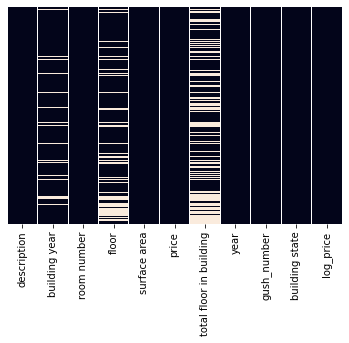

In [23]:
sns.heatmap(country_deals.isnull(),yticklabels=False,cbar=False)

Take care of the nan values. either remove them or replace them accordingly.

1. building year
15007 values are missing
2. room number
91 values are missing
3. surface area
635 values are missing
4. floor and total flor in the buiding
too many values are missing from these features, better remove them.

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 207026 entries, 1 to 217495
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   description              207026 non-null  object 
 1   building year            192103 non-null  float64
 2   room number              207014 non-null  float64
 3   floor                    169461 non-null  object 
 4   surface area             206485 non-null  object 
 5   price                    207026 non-null  int32  
 6   total floor in building  129310 non-null  float64
 7   year                     207026 non-null  int32  
 8   gush_number              207026 non-null  object 
 9   building state           207026 non-null  object 
 10  log_price                207026 non-null  float64
dtypes: float64(4), int32(2), object(5)
memory usage: 17.4+ MB


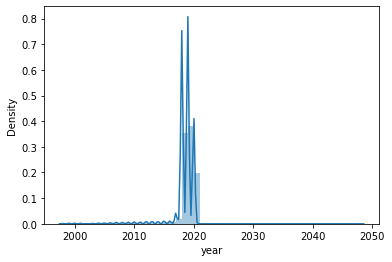

,description,building year,room number,floor,surface area,price,total floor in building,year,gush_number,log_price
building state,,,,,,,,,,
new,89308,89308,89295,73413,88982,89308,37657,89308,89308,89308
old,113186,113186,113134,99739,112877,113186,93522,113186,113186,113186
unknown,15007,0,15001,1815,15007,15007,186,15007,15007,15007


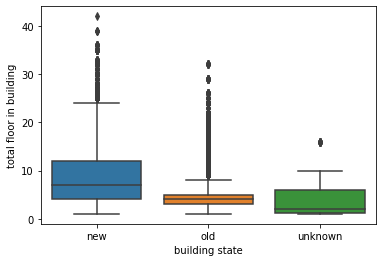

In [67]:
sns.boxplot(x= 'building state', y ='total floor in building', data=country_deals )
country_deals.groupby(['building state']).count()

Replace missing values of [building year] 

whenever I have information on the total number of floor in the building.

- For older building (mean = 1974), the median total floor is 4.
- For newer building (mean = 2015), the median total floor is 6.

In [78]:
for row, column in country_deals.iterrows():
    if np.isnan(country_deals.loc[row, 'building year']) and country_deals.loc[row,'total floor in building'] <= 4:
        country_deals.loc[row, 'building year'] = 1974
    elif np.isnan(country_deals.loc[row, 'building year']) and country_deals.loc[row,'total floor in building'] > 4:
        country_deals.loc[row, 'building year'] = 2015

country_deals.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217501 entries, 0 to 217500
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   description              217501 non-null  object 
 1   building year            202680 non-null  float64
 2   room number              217430 non-null  float64
 3   floor                    174967 non-null  object 
 4   surface area             216866 non-null  object 
 5   price                    217501 non-null  int32  
 6   total floor in building  131365 non-null  float64
 7   year                     217501 non-null  int32  
 8   gush_number              217501 non-null  object 
 9   building state           217501 non-null  object 
 10  log_price                217501 non-null  float64
dtypes: float64(4), int32(2), object(5)
memory usage: 16.6+ MB


replacing missing values in surface area and room number that tends to be corelated

In [92]:
country_deals.set_index('surface area', inplace=True)
area = []
for row, value in country_deals.iterrows():
    if 0< row < 50:
        area.append('up to 50m2')
    elif 49< row < 100:
        area.append('between 50 and 100m2')
    elif 99< row < 150:
        area.append('between 100 and 150m2')  
    elif 149 < row < 200:
        area.append('between 150 and 200m2')
    elif row > 199:
        area.append('more than 200 m2')
    else:
        area.append('unknown')
print(len(buildind_state))
country_deals.reset_index(inplace=True)
country_deals['area bins'] = area

country_deals

236819


,surface area,description,building year,room number,floor,price,total floor in building,year,gush_number,building state,log_price,area bins
0,45.0,appartment,2003.0,1.0,ראשונה,4130000,NaN,2016,19688,new,15.233788,up to 50m2
1,82.1,appartment,1970.0,3.0,ראשונה,1690000,2.0,2019,29536,old,14.340240,between 50 and 100m2
2,115.0,appartment,1970.0,4.0,קרקע,1985000,2.0,2019,29536,old,14.501130,between 100 and 150m2
3,110.0,appartment,1970.0,3.0,NaN,3333000,NaN,2018,29524,old,15.019384,between 100 and 150m2
4,76.1,appartment,1970.0,3.0,שניה,1480000,2.0,2018,29536,old,14.207553,between 50 and 100m2
...,...,...,...,...,...,...,...,...,...,...,...,...
217496,100.0,single ground house,1987.0,4.0,ראשונה,900000,NaN,2015,19255,old,13.710151,between 100 and 150m2
217497,127.0,single ground house,1992.0,5.0,NaN,752000,NaN,2015,19255,old,13.530493,between 100 and 150m2
217498,130.0,single ground house,1998.0,6.0,NaN,725000,NaN,2010,19255,old,13.493928,between 100 and 150m2
217499,76.0,single ground house,1992.0,4.0,NaN,520000,NaN,2008,19255,old,13.161586,between 50 and 100m2


,surface area,building year,room number,price,total floor in building,year,log_price
area bins,,,,,,,
between 100 and 150m2,118.40,2016.0,5.0,1700000,5.0,2019,14.346139
between 150 and 200m2,165.00,2008.0,6.0,2300000,3.0,2019,14.648420
between 50 and 100m2,75.67,1980.0,3.0,1270000,4.0,2019,14.054528
more than 200 m2,240.00,2000.0,6.0,3075000,1.0,2018,14.938816
unknown,NaN,2004.0,1.0,450001,3.0,2018,13.017007
up to 50m2,42.79,1960.0,2.0,795000,3.0,2019,13.586099


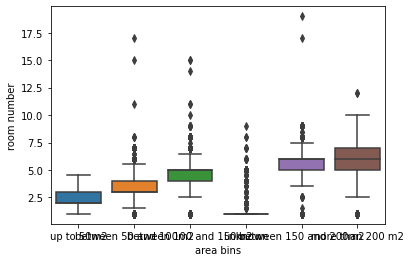

In [97]:
sns.boxplot(x= 'area bins', y='room number', data=country_deals)
country_deals.groupby(['area bins']).median()

In [108]:
for row, column in country_deals.iterrows():
    if np.isnan(country_deals.loc[row, 'surface area']):
        if 0 < country_deals.loc[row,'room number'] <= 2:
            country_deals.loc[row, 'surface area'] = 42
        elif 2 > country_deals.loc[row,'room number'] < 4:
            country_deals.loc[row, 'surface area'] = 75
        elif 4 >= country_deals.loc[row,'room number'] < 6:
            country_deals.loc[row, 'surface area'] = 118 
        elif country_deals.loc[row,'room number'] >= 6:
            country_deals.loc[row, 'surface area'] = 165    
    if np.isnan(country_deals.loc[row, 'room number']):
        if country_deals.loc[row,'area bins'] == 'up to 50m2':
            country_deals.loc[row, 'room number'] = 2
        elif country_deals.loc[row,'area bins'] == 'between 50 and 100m2':
            country_deals.loc[row, 'room number'] = 3
        elif country_deals.loc[row,'area bins'] == 'between 100 and 150m2':
            country_deals.loc[row, 'room number'] = 5
        elif country_deals.loc[row,'area bins'] == 'between 150 and 200m2':
            country_deals.loc[row, 'room number'] = 6
        elif country_deals.loc[row,'area bins'] == 'more than 200 m2':
            country_deals.loc[row, 'room number'] = 6

country_deals.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217501 entries, 0 to 217500
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface area             217496 non-null  float64
 1   description              217501 non-null  object 
 2   building year            202680 non-null  float64
 3   room number              217496 non-null  float64
 4   floor                    174967 non-null  object 
 5   price                    217501 non-null  int32  
 6   total floor in building  131365 non-null  float64
 7   year                     217501 non-null  int32  
 8   gush_number              217501 non-null  object 
 9   building state           217501 non-null  object 
 10  log_price                217501 non-null  float64
 11  area bins                217501 non-null  object 
dtypes: float64(5), int32(2), object(5)
memory usage: 18.3+ MB


Most of the data is from 2017 and later. Hence I will use only the data from 2017 to 2020.

In [109]:
recent_deals = country_deals.loc[country_deals['year']>2016]
recent_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207026 entries, 1 to 217495
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface area             207022 non-null  float64
 1   description              207026 non-null  object 
 2   building year            192267 non-null  float64
 3   room number              207022 non-null  float64
 4   floor                    169461 non-null  object 
 5   price                    207026 non-null  int32  
 6   total floor in building  129310 non-null  float64
 7   year                     207026 non-null  int32  
 8   gush_number              207026 non-null  object 
 9   building state           207026 non-null  object 
 10  log_price                207026 non-null  float64
 11  area bins                207026 non-null  object 
dtypes: float64(5), int32(2), object(5)
memory usage: 19.0+ MB


In [110]:
##check that all the rows with total floor in building were used to get the year of the building
a = recent_deals.loc[recent_deals['surface area'].isnull()]
b = a.loc[a['room number'].notnull()]
b

,surface area,description,building year,room number,floor,price,total floor in building,year,gush_number,building state,log_price,area bins


Two options to deal with missing values in the building year and surface area column.
1. To replace them by the median year (1997)
2. To remove them

For now, I will remove them as I think that this column has a significant impact on the price of the aset. I don't want to introduce too many incertainties in the model.





In [85]:
recent_deals.describe()

,building year,room number,price,total floor in building,year,log_price
count,192267.000000,207014.000000,2.070260e+05,129310.000000,207026.000000,207026.000000
mean,1992.585285,3.962293,1.740679e+06,5.770822,2018.795514,14.171596
std,24.238288,1.135865,2.541519e+06,5.378449,0.791011,0.622603
min,1800.000000,1.000000,5.000000e+04,1.000000,2017.000000,10.819798
25%,1970.000000,3.000000,1.035000e+06,3.000000,2018.000000,13.849913
50%,1997.000000,4.000000,1.485000e+06,4.000000,2019.000000,14.210926
75%,2017.000000,5.000000,2.095000e+06,7.000000,2019.000000,14.555065
max,2023.000000,19.000000,3.800000e+08,42.000000,2048.000000,19.755682


In [111]:
recent_deal_copy1 = recent_deals.copy()
recent_deal_copy1.dropna(axis = 0, subset = ['building year', 'surface area'], inplace=True)
recent_deal_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192263 entries, 1 to 217495
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface area             192263 non-null  float64
 1   description              192263 non-null  object 
 2   building year            192263 non-null  float64
 3   room number              192263 non-null  float64
 4   floor                    167756 non-null  object 
 5   price                    192263 non-null  int32  
 6   total floor in building  129309 non-null  float64
 7   year                     192263 non-null  int32  
 8   gush_number              192263 non-null  object 
 9   building state           192263 non-null  object 
 10  log_price                192263 non-null  float64
 11  area bins                192263 non-null  object 
dtypes: float64(5), int32(2), object(5)
memory usage: 17.6+ MB


In [120]:
recent_deal_copy2 = recent_deal_copy1.drop(columns = ['total floor in building', 'floor'])
recent_deal_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192263 entries, 1 to 217495
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   surface area    192263 non-null  float64
 1   description     192263 non-null  object 
 2   building year   192263 non-null  float64
 3   room number     192263 non-null  float64
 4   price           192263 non-null  int32  
 5   year            192263 non-null  int32  
 6   gush_number     192263 non-null  object 
 7   building state  192263 non-null  object 
 8   log_price       192263 non-null  float64
 9   area bins       192263 non-null  object 
dtypes: float64(4), int32(2), object(4)
memory usage: 14.7+ MB


In [122]:
description = pd.get_dummies(recent_deal_copy2['description'])
recent_deal_copy2 = pd.concat([recent_deal_copy2,description],axis=1)
recent_deal_copy2

,surface area,description,building year,room number,price,year,gush_number,building state,log_price,area bins,appartment,double ground house,garden appartment,roof top appartment,single ground house
1,82.1,appartment,1970.0,3.0,1690000,2019,29536,old,14.340240,between 50 and 100m2,1,0,0,0,0
2,115.0,appartment,1970.0,4.0,1985000,2019,29536,old,14.501130,between 100 and 150m2,1,0,0,0,0
3,110.0,appartment,1970.0,3.0,3333000,2018,29524,old,15.019384,between 100 and 150m2,1,0,0,0,0
4,76.1,appartment,1970.0,3.0,1480000,2018,29536,old,14.207553,between 50 and 100m2,1,0,0,0,0
5,127.8,appartment,1990.0,5.0,1900000,2018,29536,old,14.457365,between 100 and 150m2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217482,210.0,single ground house,1992.0,5.0,1860000,2017,19161,old,14.436088,more than 200 m2,0,0,0,0,1
217483,200.0,single ground house,2000.0,8.0,2065000,2017,19042,old,14.540641,more than 200 m2,0,0,0,0,1
217493,89.0,single ground house,1998.0,3.0,870000,2019,19255,old,13.676250,between 50 and 100m2,0,0,0,0,1
217494,101.0,single ground house,1998.0,5.0,925000,2018,19255,old,13.737550,between 100 and 150m2,0,0,0,0,1


In [124]:
recent_deal_copy3 = recent_deal_copy2.drop(columns = ['description', 'building state', 'area bins'])
recent_deal_copy3['gush_number'] = recent_deal_copy3['gush_number'].astype('int')
recent_deal_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192263 entries, 1 to 217495
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   surface area         192263 non-null  float64
 1   building year        192263 non-null  float64
 2   room number          192263 non-null  float64
 3   price                192263 non-null  int32  
 4   year                 192263 non-null  int32  
 5   gush_number          192263 non-null  int32  
 6   log_price            192263 non-null  float64
 7   appartment           192263 non-null  uint8  
 8   double ground house  192263 non-null  uint8  
 9   garden appartment    192263 non-null  uint8  
 10  roof top appartment  192263 non-null  uint8  
 11  single ground house  192263 non-null  uint8  
dtypes: float64(4), int32(3), uint8(5)
memory usage: 10.5 MB


In [136]:
recent_deal_copy3['mamad_balcony'] = list([2] * len(recent_deal_copy3))
for row, column in recent_deal_copy3.iterrows():
    if recent_deal_copy3.loc[row,'building year']>1991:
#         print(row)
        recent_deal_copy3.loc[row, 'mamad_balcony'] = 1
    else:
        recent_deal_copy3.loc[row, 'mamad_balcony'] = 0
recent_deal_copy3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192263 entries, 1 to 217495
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   surface area         192263 non-null  float64
 1   building year        192263 non-null  float64
 2   room number          192263 non-null  float64
 3   price                192263 non-null  int32  
 4   year                 192263 non-null  int32  
 5   gush_number          192263 non-null  int32  
 6   log_price            192263 non-null  float64
 7   appartment           192263 non-null  uint8  
 8   double ground house  192263 non-null  uint8  
 9   garden appartment    192263 non-null  uint8  
 10  roof top appartment  192263 non-null  uint8  
 11  single ground house  192263 non-null  uint8  
 12  mamad_balcony        192263 non-null  int64  
dtypes: float64(4), int32(3), int64(1), uint8(5)
memory usage: 16.9 MB


In [137]:
recent_deal_copy3.to_csv(r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\recent_deals_clean.csv')

,surface area,building year,room number,price,year,gush_number,log_price,appartment,double ground house,garden appartment,roof top appartment,single ground house
surface area,1.000000,0.354342,0.673252,0.248433,-0.023409,0.036147,0.456517,-0.369751,0.258243,0.048792,0.066024,0.265177
building year,0.354342,1.000000,0.433409,0.100403,0.051357,0.026598,0.325873,-0.016285,0.010559,0.048389,0.037318,-0.034374
room number,0.673252,0.433409,1.000000,0.207912,-0.005316,0.020356,0.500457,-0.291577,0.215742,0.051324,0.071137,0.179132
price,0.248433,0.100403,0.207912,1.000000,0.010157,-0.061386,0.475503,-0.117975,0.084488,0.014872,0.032712,0.077818
year,-0.023409,0.051357,-0.005316,0.010157,1.000000,-0.000758,0.028003,0.065355,-0.032613,-0.004743,-0.000676,-0.068131
gush_number,0.036147,0.026598,0.020356,-0.061386,-0.000758,1.000000,-0.154925,-0.078447,0.018398,0.031401,-0.010574,0.090921
log_price,0.456517,0.325873,0.500457,0.475503,0.028003,-0.154925,1.000000,-0.176455,0.146948,0.027851,0.067093,0.082831
appartment,-0.369751,-0.016285,-0.291577,-0.117975,0.065355,-0.078447,-0.176455,1.000000,-0.621287,-0.398326,-0.248090,-0.584487
double ground house,0.258243,0.010559,0.215742,0.084488,-0.032613,0.018398,0.146948,-0.621287,1.000000,-0.020241,-0.012606,-0.029700
garden appartment,0.048792,0.048389,0.051324,0.014872,-0.004743,0.031401,0.027851,-0.398326,-0.020241,1.000000,-0.008082,-0.019042


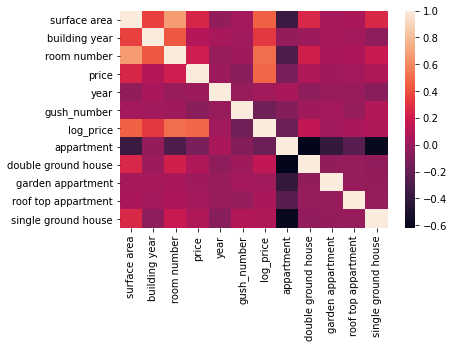

In [126]:
corr_deal = recent_deal_copy3.corr()
sns.heatmap(corr_deal)
corr_deal

KeyboardInterrupt: 

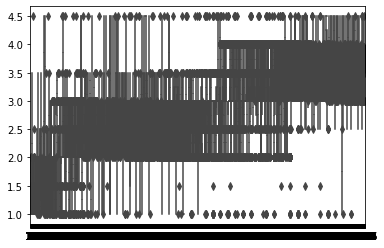

In [91]:
sns.boxplot(x='surface area', y='room number', data = recent_deal_copy1)

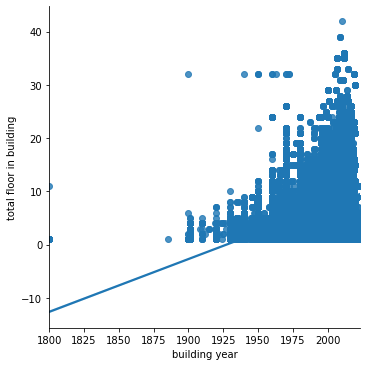

In [28]:
#sns.displot(country_deals['building year'])
sns.distplot(country_deals['year'])

sns.lmplot(x= 'building year', y='total floor in building', data = country_deals)

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

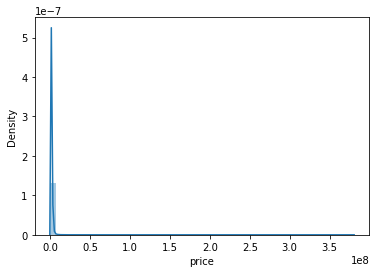

In [18]:
sns.distplot(country_deals['price'])

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

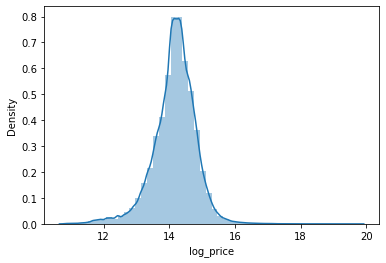

In [20]:
country_deals['log_price'] = np.log1p(country_deals['price'])
sns.distplot(country_deals['log_price'])

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: loop of ufunc does not support argument 0 of type int which has no callable log1p method

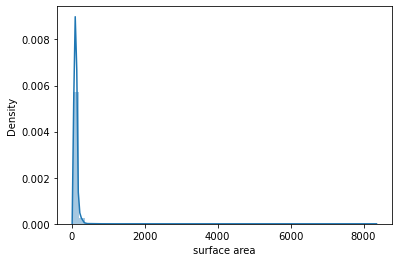

In [22]:
sns.distplot(country_deals['surface area'])
country_deals['log_surface area'] = np.log1p(country_deals['surface area'])
sns.distplot(country_deals['log_surface area'])

g-h. remove extreme values and set surface area to group

In [101]:
country_deals = country_deals.loc[country_deals['surface area']<300]
country_deals = country_deals.loc[country_deals['price']<4000000]
country_deals = country_deals.loc[country_deals['year']<=2020]
country_deals = country_deals.loc[country_deals['year']> 2017]

country_deals.set_index('surface area', inplace=True)
area = []
for row, value in country_deals.iterrows():
    if 0< row < 50:
        area.append('up to 50m2')
    elif 49< row < 100:
        area.append('between 50 and 100m2')
    elif 99< row < 150:
        area.append('between 100 and 150m2')  
    elif 149 < row < 200:
        area.append('between 150 and 200m2')
    elif row > 199:
        area.append('more than 200 m2')
    else:
        area.append('unknown')
print(len(buildind_state))
country_deals.reset_index(inplace=True)
country_deals['area bins'] = area
# country_deals.to_csv(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\nadlan_clean)    

236819


C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

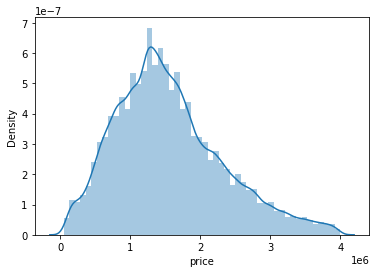

In [51]:
sns.distplot(country_deals['price'])

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surface area', ylabel='Density'>

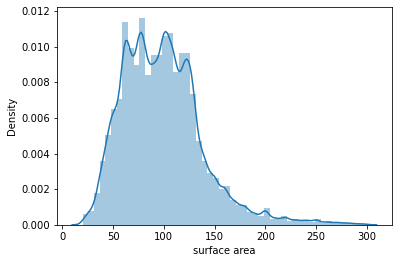

In [52]:
sns.distplot(country_deals['surface area'])

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

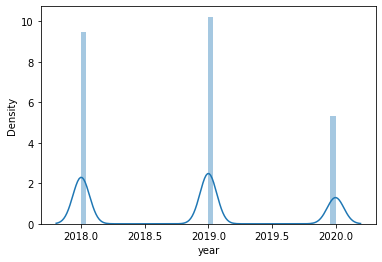

In [87]:
sns.distplot(country_deals['year'])

Work on the building state (old or new) depending on the number of floor in the building

C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total floor in building', ylabel='building state'>

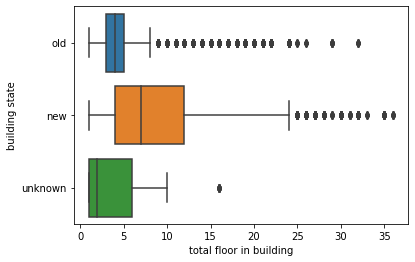

In [73]:
sns.boxplot('total floor in building', 'building state', data=country_deals)

C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


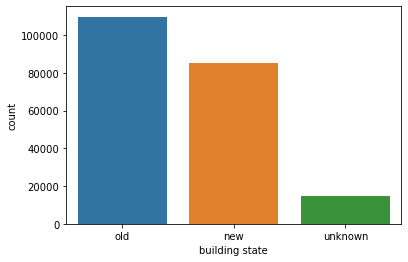

In [74]:
sns.countplot('building state',  data=country_deals)


In [102]:
for row, value in country_deals.iterrows():
    if value['building state'] == 'unknown':
        if value['total floor in building'] < 5:
            country_deals.loc[row, 'building state'] = 'old'
        elif value['total floor in building'] >= 5:
            country_deals.loc[row, 'building state'] = 'new'
        else:
            country_deals.loc[row, 'building state'] = 'unknown'
country_deals            

,surface area,description,building year,room number,floor,price,total floor in building,year,gush_number,building state,area bins
0,82.1,appartment,1970.0,3.0,ראשונה,1690000,2.0,2019,29536,old,between 50 and 100m2
1,115.0,appartment,1970.0,4.0,קרקע,1985000,2.0,2019,29536,old,between 100 and 150m2
2,110.0,appartment,1970.0,3.0,NaN,3333000,NaN,2018,29524,old,between 100 and 150m2
3,76.1,appartment,1970.0,3.0,שניה,1480000,2.0,2018,29536,old,between 50 and 100m2
4,127.8,appartment,1990.0,5.0,קרקע,1900000,2.0,2018,29536,old,between 100 and 150m2
...,...,...,...,...,...,...,...,...,...,...,...
195066,65.0,single ground house,1947.0,3.0,ראשונה,120000,NaN,2018,8902,old,between 50 and 100m2
195067,65.0,single ground house,1947.0,3.0,ראשונה,120000,NaN,2018,8902,old,between 50 and 100m2
195068,154.0,single ground house,2010.0,5.0,ראשונה,1900000,15.0,2020,8901,new,between 150 and 200m2
195069,89.0,single ground house,1998.0,3.0,NaN,870000,NaN,2019,19255,old,between 50 and 100m2


C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='building state', ylabel='count'>

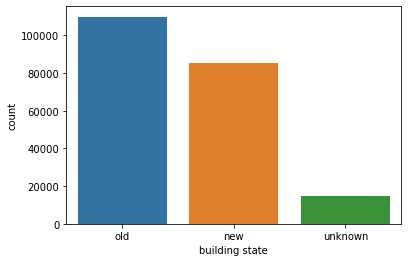

In [76]:
sns.countplot('building state',  data=country_deals)

In [ ]:
sns.countplot('building state', data=country_deals)


C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


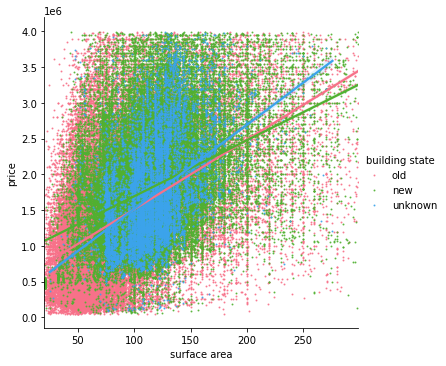

In [29]:
sns.lmplot( 'surface area', 'price',data=country_deals, scatter_kws={"s": 1}, hue = 'building state', fit_reg=True, palette="husl")

In [103]:
country_deals.to_csv(r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\country_deals.csv')

In [ ]:
sns.lmplot( 'surface area', 'price',data=country_deals, scatter_kws={"s": 1}, hue = 'description', fit_reg=True, palette="husl")